# Import All Libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
%matplotlib inline

# Import the dataset
### This dataset is downloaded from Kaggle (link provided above)

In [8]:
data = r'/Users/Downloads/NVDA(2).csv' # Use the path on your machine 
df_nvda_stock_data = pd.read_csv(data)
df_nvda_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000


# Check dataframe columns

In [10]:
df_nvda_stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Create Year and Month Column

In [12]:
df_nvda_stock_data['Year'] = pd.to_datetime(df_nvda_stock_data['Date']).dt.year
df_nvda_stock_data['Month'] = pd.to_datetime(df_nvda_stock_data['Date']).dt.month
df_nvda_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,2019,5
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,2019,5
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,2019,5
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,2019,5
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,2019,5


# Aggregate by Year and Month

In [14]:
df_nvda_stock_data_agg = df_nvda_stock_data.groupby(['Year', 'Month']).sum()
df_nvda_stock_data_agg.head()

Date        Open  \
Year Month                                                                  
2019 5      2019-05-232019-05-242019-05-282019-05-292019-0...  215.622501   
     6      2019-06-032019-06-042019-06-052019-06-062019-0...  747.337502   
     7      2019-07-012019-07-022019-07-032019-07-052019-0...  925.384992   
     8      2019-08-012019-08-022019-08-052019-08-062019-0...  884.742499   
     9      2019-09-032019-09-042019-09-052019-09-062019-0...  884.604991   

                  High         Low       Close   Adj Close     Volume  
Year Month                                                             
2019 5      217.697503  211.235005  212.677501  211.310925  272160400  
     6      758.957508  738.452504  748.342494  744.108508  823334000  
     7      935.145000  912.237498  923.902508  918.675211  841598400  
     8      897.354994  869.102496  882.064997  877.196427  945032800  
     9      897.112503  874.512498  886.300001  882.157840  634776800

# Check the columns

In [16]:
df_nvda_stock_data_agg.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Modify Date Column for plotting
### Note: You can also create a new column instead of modifying if you need to retain original date column data

In [18]:
df_nvda_stock_data_agg = df_nvda_stock_data_agg.reset_index()
df_nvda_stock_data_agg['Date'] = df_nvda_stock_data_agg['Month'].map(str)+ '-' +df_nvda_stock_data_agg['Year'].map(str)
df_nvda_stock_data_agg['Date'] = pd.to_datetime(df_nvda_stock_data_agg['Date'], format='%m-%Y').dt.strftime('%m-%Y')
df_nvda_stock_data_agg.head()

,Year,Month,Date,Open,High,Low,Close,Adj Close,Volume
0,2019,5,05-2019,215.622501,217.697503,211.235005,212.677501,211.310925,272160400
1,2019,6,06-2019,747.337502,758.957508,738.452504,748.342494,744.108508,823334000
2,2019,7,07-2019,925.384992,935.145000,912.237498,923.902508,918.675211,841598400
3,2019,8,08-2019,884.742499,897.354994,869.102496,882.064997,877.196427,945032800
4,2019,9,09-2019,884.604991,897.112503,874.512498,886.300001,882.157840,634776800


# Select rows and columns for plotting

In [20]:
y_axis = df_nvda_stock_data_agg.iloc[:,[2, 6]]
y_axis.head()

,Date,Close
0,05-2019,212.677501
1,06-2019,748.342494
2,07-2019,923.902508
3,08-2019,882.064997
4,09-2019,886.300001


# Final Analysis

<Axes: xlabel='Date'>

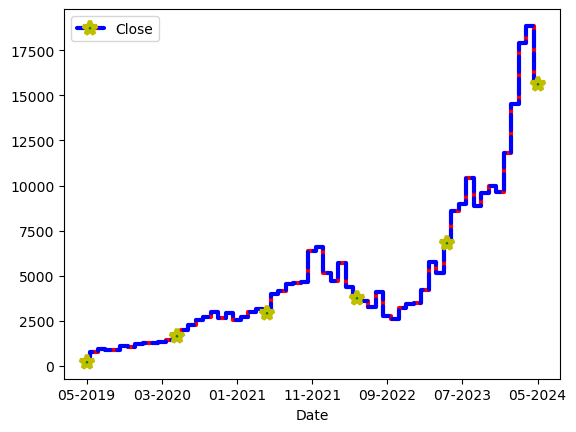

In [21]:
analysis = y_axis.reset_index().plot(x='Date', y='Close'
                                 , color = 'b', marker = '*'
                  , linestyle = '--'
                  , url = 'www.devtechie.com'
                  , visible = True
                  #, animated = False
                  , drawstyle = 'steps-mid'
                  , gapcolor = 'r'
                  , linewidth = 3
                  #, clip_on = False
                  , dash_capstyle = 'round'
                  , fillstyle = 'full'
                  , markeredgecolor = 'y'
                  , markeredgewidth = 3
                  , markerfacecolor = 'g'
                  , markersize = 10
                  , markevery = 12
                  , mouseover = False )
analysis